In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_pickle("C:/Users/User/1Ironhack/DATA/Visualising_Real_Time_Data_Project/airbnb_listings_price_normalized.pkl")

In [3]:
df.head()

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Country,latitude,longitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month,Amenity_Count,Country_Average,Normalized
0,5534229,A 2 Passi da San Pietro,28697142,Veronica,100.0,False,5.0,Italy,41.895878,12.454430,...,9.0,10.0,8.0,8.0,9.0,9.0,0.08,11,91.322033,0.810319
1,5903406,cosy small apartment,1853799,Veronika,88.0,False,2.0,Austria,48.246033,16.340743,...,9.0,10.0,10.0,10.0,10.0,8.0,0.27,12,65.071831,0.845220
2,5203533,Rummelig lejl i hjertet af KBH,24801534,Marianne,100.0,False,1.0,Denmark,55.681579,12.562770,...,10.0,10.0,10.0,10.0,10.0,10.0,0.28,8,599.040734,1.657650
3,8858475,Modern; spacious and warm; with its own balcony,3000397,Lasse,100.0,True,1.0,Denmark,55.708413,12.596737,...,10.0,10.0,10.0,10.0,9.0,10.0,0.79,23,599.040734,1.163527
4,4215511,Nice room; Bohemian Cph; N�rrebro,126020,Lea,100.0,True,2.0,Denmark,55.687506,12.558365,...,10.0,10.0,9.0,10.0,10.0,10.0,1.40,10,599.040734,0.707798


In [4]:
df.dtypes

Listing ID                             object
Name                                   object
Host ID                                object
Host Name                              object
Host Response Rate                    float64
Host Is Superhost                        bool
Host total listings count             float64
Country                                object
latitude                              float64
longitude                             float64
Property type                          object
Room type                              object
Accommodates                            int64
Bathrooms                             float64
Bedrooms                              float64
Amenities                              object
Price                                 float64
Minimum nights                          int64
Maximum nights                          int64
Availability 365                        int64
Calendar last scraped          datetime64[ns]
Number of reviews                 

In [5]:
df = df.rename(columns={"Review Scores Rating": "Review_Scores_Rating"})

In [6]:
df['Amenity_Count'].describe()

count    380224.000000
mean         16.109599
std           6.280906
min           1.000000
25%          12.000000
50%          15.000000
75%          20.000000
max          87.000000
Name: Amenity_Count, dtype: float64

In [7]:
df['Amenity_Count'].mode()

0    14
dtype: int64

* The average number of amenities for the listings reviewed is 16.
* The median is 15 amenities.
* The most common number of amenities (mode) is 14.
* The maximum number of amenities is 87.
* Only 25% of the listings have more than 19 amenities though.

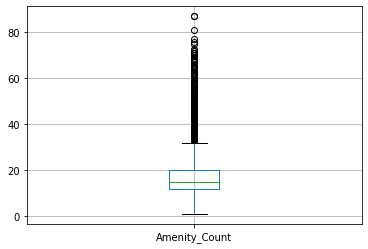

In [8]:
df.boxplot(column='Amenity_Count');

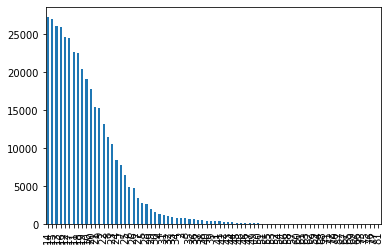

In [123]:
fig, ax = plt.subplots()
df['Amenity_Count'].value_counts().plot(ax=ax, kind='bar');

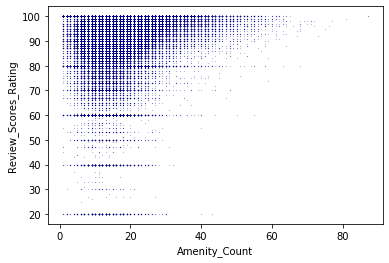

In [10]:
df.plot.scatter(x='Amenity_Count',
     y='Review_Scores_Rating',
     c='DarkBlue',
        s=0.01);

In [11]:
df['Review_Scores_Rating'].describe()

count    380224.000000
mean         93.088024
std           8.373247
min          20.000000
25%          90.000000
50%          95.000000
75%         100.000000
max         100.000000
Name: Review_Scores_Rating, dtype: float64

In [12]:
df['Review_Scores_Rating'].mode()

0    100.0
dtype: float64

In [13]:
df['Review_Scores_Rating'].quantile(.08)

80.0

In [14]:
df['Review_Scores_Rating'].quantile(.03)

75.0

* The average review score rating for the listings reviewed is 93.
* The median is 95 amenities.
* The most common review score rating (mode) is 100.
* The maximum review score rating is 100.
* Only 25% of the review score ratings are below 90.
* Only 8% of the review score ratings are below 80.
* Only 3% of the review scores are below 75.

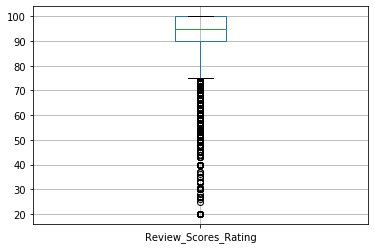

In [15]:
df.boxplot(column='Review_Scores_Rating');

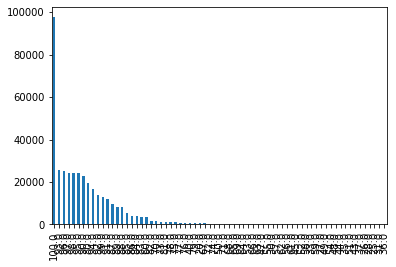

In [16]:
# The vast majority of ratings are at 100
fig, ax = plt.subplots()
df['Review_Scores_Rating'].value_counts().plot(ax=ax, kind='bar');

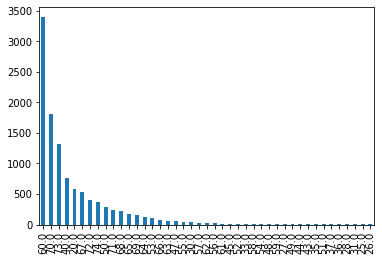

In [18]:
# Histogram showing frequency of review score ratings under 75
df_u75=df[df.Review_Scores_Rating < 75]
fig, ax = plt.subplots()
df_u75['Review_Scores_Rating'].value_counts().plot(ax=ax, kind='bar');

In [20]:
# creating dataset with review score rating 75 and over
df_g75=df[df.Review_Scores_Rating >= 75]

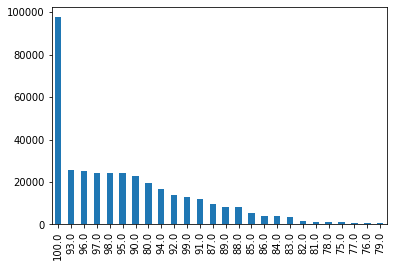

In [21]:
# Histogram showing frequency of review score ratings of 75 and over
fig, ax = plt.subplots()
df_g75['Review_Scores_Rating'].value_counts().plot(ax=ax, kind='bar');

In [22]:
# creating dataset with review score rating 75 and over matching amenity count under 30
df_u75_u30=df_u75[df_u75.Amenity_Count < 30]

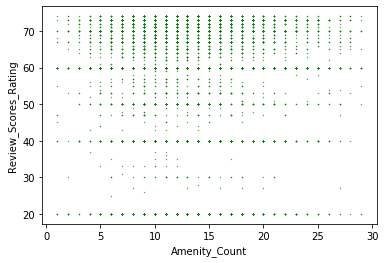

In [23]:
# creating scatterplot with review score rating 75 and over, matching amenity count under 30
df_u75_u30.plot.scatter(x='Amenity_Count',
     y='Review_Scores_Rating',
     c='green',
        s=0.1);

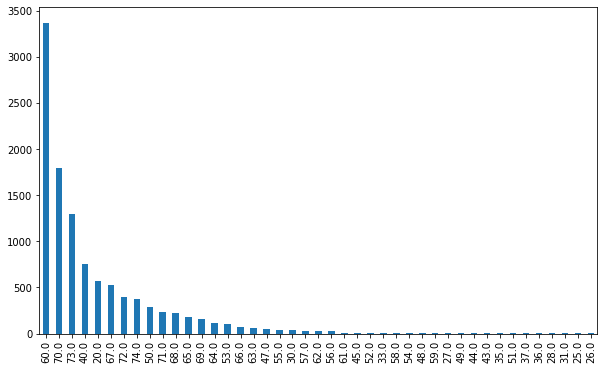

In [129]:
# Histogram showing frequency of review score ratings under 75 matching #of amenities under 30
fig, ax = plt.subplots(figsize=(10,6))
df_u75_u30['Review_Scores_Rating'].value_counts().plot(ax=ax, kind='bar');

Text(0.5, 0, 'Review_Scores_Rating greater 75')

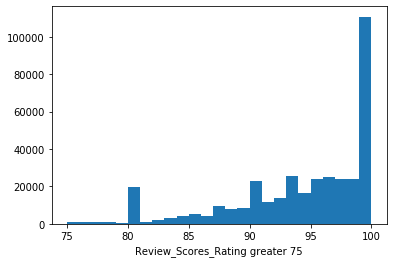

In [76]:
# Histogram showing frequency (number counts) of review score ratings over 75 with 25 Bins
plt.subplot()
plt.hist(df_g75['Review_Scores_Rating'],25)
plt.xlabel("Review_Scores_Rating greater 75")

In [77]:
# over 100.000 ratings, which is more than 25% of total are at 100%

In [66]:
# Look at where the added value ends (at what count of amenities does the benefit stop)

In [ ]:
# creating a new datset just with amenity count, review score rating and rating count
df1=df.groupby('Amenity_Count').agg({'Review_Scores_Rating' : 'mean'})
df2=df.groupby('Amenity_Count').agg({'Review_Scores_Rating' : 'count'})
df3=df1.merge(df2, on="Amenity_Count")

In [127]:
#renaming column names
df4=df3.rename(columns={"Review_Scores_Rating_x": "Avg_Rating", "Review_Scores_Rating_y": "Rating_Count"})
df4.reset_index(inplace=True)
df4

,Amenity_Count,Avg_Rating,Rating_Count
0,1,90.033854,384
1,2,91.492696,753
2,3,89.775815,736
3,4,88.804615,1300
4,5,89.317055,2703
...,...,...,...
73,75,95.000000,1
74,76,96.000000,1
75,77,98.000000,1
76,81,99.000000,1


In [ ]:
# Which average review score matches the specific number of amenities

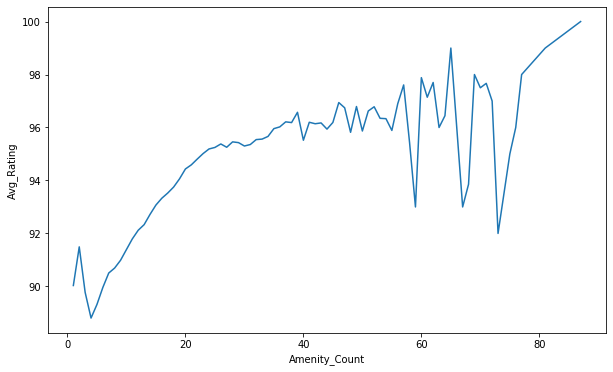

In [133]:
fig, ax = plt.subplots(figsize=(10,6))
ax=sns.lineplot(data=df4, x='Amenity_Count', y='Avg_Rating');

* Just looking at the average rating for the amenity count the maximum average rating of 100 is achieved with the maximum number of amenities 87. Lookiong at the data, we discover though that there are only 2 reviews for listings with 87 amenities. In order to be able to compare listings with a reasonable amount of reviews it seems rather feasable to define a cut off value for a minimum amount of review ratings per amenity count.

In [ ]:
# Which number of ratings corresponds to the specific number of amenities

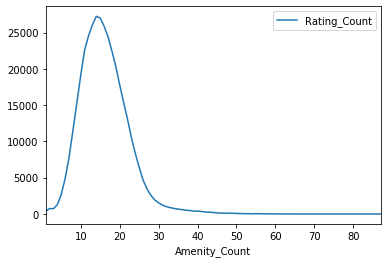

In [128]:
df4.plot(x='Amenity_Count', y='Rating_Count');

In [122]:
df4['Rating_Count'].describe()

count       78.000000
mean      4874.666667
std       8392.931491
min          1.000000
25%         19.750000
50%        391.500000
75%       4850.000000
max      27233.000000
Name: Rating_Count, dtype: float64

In [126]:
df4.loc[df4['Rating_Count'].idxmax()]

Amenity_Count       14.000000
Avg_Rating          92.719164
Rating_Count     27233.000000
Name: 13, dtype: float64

* The maximum number of ratings (27233) are for 14 amenities with an average rating of 92.71

* setting a cut off value of 200 for the minimum value of ratings per amenities count

In [134]:
# eliminating entries for amenities with less than 200 reviews
df5=df4[df4.Rating_Count>= 200]

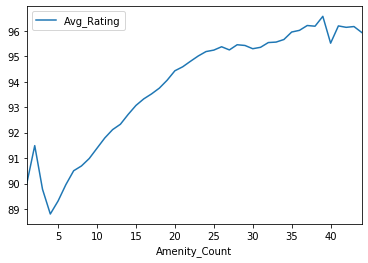

In [135]:
df5.plot(x='Amenity_Count', y='Avg_Rating');

In [136]:
df5.loc[df5['Avg_Rating'].idxmax()]

Amenity_Count     39.000000
Avg_Rating        96.573935
Rating_Count     399.000000
Name: 38, dtype: float64

* For the amenities count that achieve at least 200 reviews, the maximum average rating are for listings with 39 aminities and an average rating of 96.57.

In [138]:
# eliminating entries for amenities with 30 or less amenities
df6=df5[df5.Amenity_Count<=30]

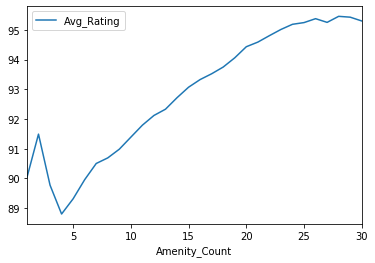

In [139]:
df6.plot(x='Amenity_Count', y='Avg_Rating');

In [140]:
df6.loc[df6['Avg_Rating'].idxmax()]

Amenity_Count      28.000000
Avg_Rating         95.457209
Rating_Count     2594.000000
Name: 27, dtype: float64

* Compare slope of up to 30 and more than 30 amenities against review score rating.

* Linear regression on amenity count vs ratings

* check out 3D plots with Jens tool